In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

Using TensorFlow backend.


In [24]:
seed = 21899

In [18]:
features = pd.read_csv('Data Cleaning/selected_data.csv')
features.head()

,Unnamed: 0,AATS8p,AATS8v,AATSC0d,AATSC0s,AATSC1c,AATSC1i,AATSC4c,AATSC4i,AATSC6dv,...,PEOE_VSA2,PEOE_VSA9,SIC5,SaaN,SaaNH,SssSiH2,Xch-7d,nFARing,nG12FHRing,nHBDon
0,0,1.692047,234.750107,0.574839,0.479809,0.000000,-0.280498,0.000000,-0.105693,0.100130,...,0.0,0.000000,0.987985,13.774789,0.000000,0.000000,1.197844,0,1,0
1,1,1.697847,202.250043,0.609375,0.271559,0.000000,-0.102372,0.000000,0.112876,-0.245837,...,0.0,0.000000,0.981210,4.903642,0.000000,-0.237157,1.099513,1,1,0
2,2,1.519396,180.634859,0.646178,0.295003,-0.003817,-0.018808,0.000335,-0.128555,-1.040159,...,0.0,9.519601,0.975022,0.000000,3.354368,-0.521974,1.460154,1,1,1
3,3,1.996074,183.538805,0.596939,0.253981,0.000000,-0.785079,0.000000,-0.906693,-0.234105,...,0.0,0.000000,0.955425,0.000000,0.000000,-0.114153,0.913246,2,0,0
4,4,1.785965,228.899102,0.625306,0.312798,0.000000,0.081051,0.000000,0.237523,-0.259253,...,0.0,0.000000,0.977719,0.000000,0.000000,0.000000,1.356599,1,1,0


In [19]:
features = features.drop(columns = 'Unnamed: 0')
features.head()

,AATS8p,AATS8v,AATSC0d,AATSC0s,AATSC1c,AATSC1i,AATSC4c,AATSC4i,AATSC6dv,AATSC8i,...,PEOE_VSA2,PEOE_VSA9,SIC5,SaaN,SaaNH,SssSiH2,Xch-7d,nFARing,nG12FHRing,nHBDon
0,1.692047,234.750107,0.574839,0.479809,0.000000,-0.280498,0.000000,-0.105693,0.100130,-0.001686,...,0.0,0.000000,0.987985,13.774789,0.000000,0.000000,1.197844,0,1,0
1,1.697847,202.250043,0.609375,0.271559,0.000000,-0.102372,0.000000,0.112876,-0.245837,0.177515,...,0.0,0.000000,0.981210,4.903642,0.000000,-0.237157,1.099513,1,1,0
2,1.519396,180.634859,0.646178,0.295003,-0.003817,-0.018808,0.000335,-0.128555,-1.040159,-0.349845,...,0.0,9.519601,0.975022,0.000000,3.354368,-0.521974,1.460154,1,1,1
3,1.996074,183.538805,0.596939,0.253981,0.000000,-0.785079,0.000000,-0.906693,-0.234105,-0.168336,...,0.0,0.000000,0.955425,0.000000,0.000000,-0.114153,0.913246,2,0,0
4,1.785965,228.899102,0.625306,0.312798,0.000000,0.081051,0.000000,0.237523,-0.259253,-0.026853,...,0.0,0.000000,0.977719,0.000000,0.000000,0.000000,1.356599,1,1,0


In [22]:
fe_list = features.columns.tolist()

In [10]:
data = pd.read_csv('Database/HCEPD_100K.csv')
data = data.head(50)

In [23]:
X = features[fe_list].values
Y = data[['pce']].values

In [28]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=seed)

In [30]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [31]:
X_test = X_train_scaler.transform(X_test_pn)

In [54]:
def nnmodel():
    # assemble the structure
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
   # model.add(Dense(30, kernel_initializer='normal', activation='relu'))
   # model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [63]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=nnmodel,
        epochs=150, batch_size=40, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.25, epochs=150, 
        batch_size=40, verbose=0)

In [64]:
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.00 and for validation is 0.56


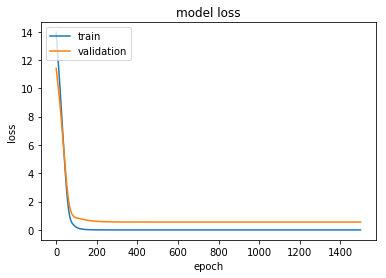

In [65]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [66]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

10/10 [==============================] - 0s 138us/step
test set mse is 1.44
